In [67]:
import pandas as pd
import numpy as np
import sklearn
import scipy
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
d_slry=pd.read_csv("Salary_Data.csv")
d_slry.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


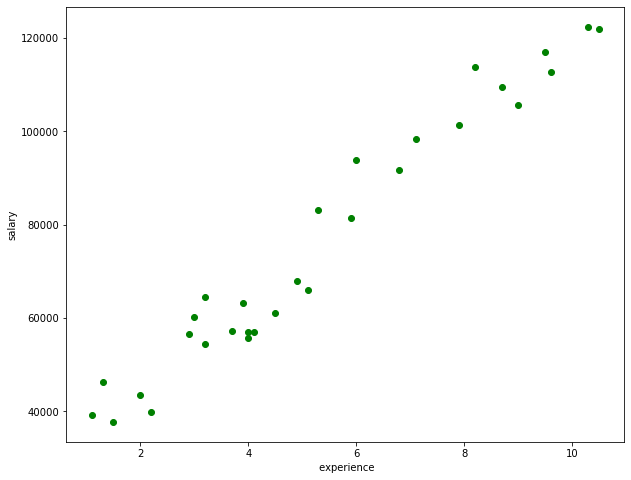

In [69]:
plt.figure(figsize=(10,8))
plt.scatter(d_slry.YearsExperience,d_slry.Salary,facecolor="green")
plt.xlabel(" experience")
plt.ylabel("salary")
plt.show()

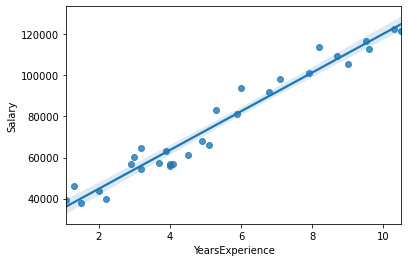

In [70]:
sns.regplot(x="YearsExperience",y="Salary",data=d_slry)
plt.show()

In [71]:
d_slry.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [72]:
d_slry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [73]:
d_slry.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [74]:
x=d_slry[["YearsExperience"]]
x.head(3)

,YearsExperience
0,1.1
1,1.3
2,1.5


In [75]:
y=d_slry[["Salary"]]
y.head(3)

,Salary
0,39343.0
1,46205.0
2,37731.0


In [76]:
import statsmodels.formula.api as smf

In [77]:
model1=smf.ols("y~x",data=d_slry).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        12:21:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
print(model1.pvalues)

Intercept    5.511950e-12
x            1.143068e-20
dtype: float64


In [79]:
model2=smf.ols('y~ np.log(x)',data=d_slry).fit()
model2.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           3.25e-13
Time:                        12:21:57   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(x)   4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
(model2.rsquared,model2.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

creating a predicted model

In [81]:
lm=LinearRegression()
A=d_slry["YearsExperience"].values.reshape(30,1)
B=d_slry["Salary"].values.reshape(30,1)
reg_sklearn=lm.fit(A,B)

In [82]:
print(reg_sklearn.coef_)
print(reg_sklearn.intercept_)

[[9449.96232146]]
[25792.20019867]


In [83]:
reg_sklearn.predict(A)

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

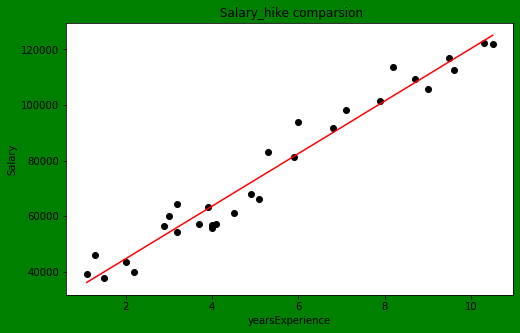

In [84]:
plt.figure(figsize=(8,5),facecolor="green")
plt.scatter(d_slry.YearsExperience,d_slry.Salary,color="black")
plt.plot(d_slry.YearsExperience,reg_sklearn.predict(A),color="red")
plt.xlabel("yearsExperience")
plt.ylabel("Salary")
plt.title(" Salary_hike comparsion")
plt.show()

In [85]:
#model validation
pred_model_lm=reg_sklearn.predict(A)
r2_score(d_slry["Salary"],pred_model_lm)

0.9569566641435086